#1. Darknet Clone

Runtime => GPU

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 25.40 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [2]:
!ls -al darknet

total 248
drwxr-xr-x 14 root root  4096 Mar 22 23:41 .
drwxr-xr-x  1 root root  4096 Mar 22 23:40 ..
drwxr-xr-x  4 root root  4096 Mar 22 23:41 3rdparty
drwxr-xr-x  3 root root  4096 Mar 22 23:41 build
-rwxr-xr-x  1 root root  7878 Mar 22 23:41 build.ps1
-rwxr-xr-x  1 root root  1960 Mar 22 23:41 build.sh
drwxr-xr-x  3 root root  4096 Mar 22 23:41 cfg
drwxr-xr-x  2 root root  4096 Mar 22 23:41 .circleci
drwxr-xr-x  3 root root  4096 Mar 22 23:41 cmake
-rw-r--r--  1 root root 21433 Mar 22 23:41 CMakeLists.txt
-rw-r--r--  1 root root  1373 Mar 22 23:41 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9467 Mar 22 23:41 darknet_images.py
-rw-r--r--  1 root root 10334 Mar 22 23:41 darknet.py
-rw-r--r--  1 root root  5227 Mar 22 23:41 darknet_video.py
drwxr-xr-x  3 root root  4096 Mar 22 23:41 data
drwxr-xr-x  8 root root  4096 Mar 22 23:41 .git
drwxr-xr-x  4 root root  4096 Mar 22 23:41 .github
-rw-r--r--  1 root root   588 Mar 22 23:41 .gitignore
-rwxr-xr-x  1 root root   110 Mar 22 23:41 i

In [3]:
%cd darknet

/content/darknet


In [4]:
# change makefile to have GPU,OPENCV, CUDNN enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [5]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [6]:
#Compile Sources
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [7]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-03-22 23:42:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.8MB/s    in 10s     

2021-03-22 23:42:52 (23.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
!ls -al data

total 1744
drwxr-xr-x  3 root root   4096 Mar 22 23:41 .
drwxr-xr-x 16 root root   4096 Mar 22 23:42 ..
-rw-r--r--  1 root root 140047 Mar 22 23:41 9k.tree
-rw-r--r--  1 root root    387 Mar 22 23:41 coco9k.map
-rw-r--r--  1 root root    625 Mar 22 23:41 coco.names
-rw-r--r--  1 root root 163759 Mar 22 23:41 dog.jpg
-rw-r--r--  1 root root 141886 Mar 22 23:41 eagle.jpg
-rw-r--r--  1 root root 382965 Mar 22 23:41 giraffe.jpg
-rw-r--r--  1 root root     80 Mar 22 23:41 goal.txt
-rw-r--r--  1 root root 133495 Mar 22 23:41 horses.jpg
-rw-r--r--  1 root root 218420 Mar 22 23:41 imagenet.labels.list
-rw-r--r--  1 root root 246356 Mar 22 23:41 imagenet.shortnames.list
drwxr-xr-x  2 root root  20480 Mar 22 23:41 labels
-rw-r--r--  1 root root   5476 Mar 22 23:41 openimages.names
-rw-r--r--  1 root root 113880 Mar 22 23:41 person.jpg
-rw-r--r--  1 root root 174515 Mar 22 23:41 scream.jpg
-rw-r--r--  1 root root    135 Mar 22 23:41 voc.names


In [9]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

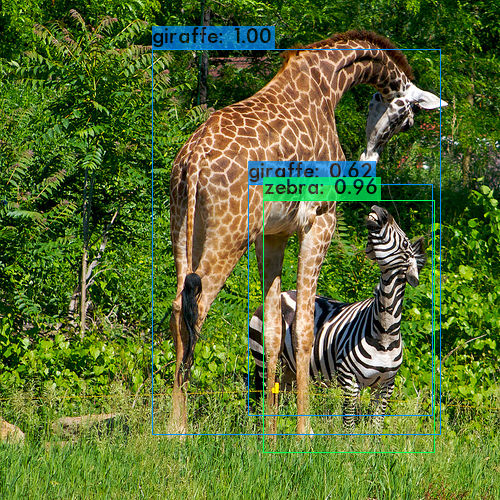

In [17]:
import cv2

from google.colab.patches import cv2_imshow

result = cv2.imread('predictions.jpg')
cv2_imshow(result)

#2. OpenCV YOLO Video


In [23]:
import IPython
import numpy as np
import time
import math

min_confidence = 0.5

In [14]:
weight_file = 'yolov3.weights'
cfg_file = 'cfg/yolov3.cfg'
name_file = 'data/coco.names'

file_name = 'cabc30fc-e7726578.mp4'

In [15]:
!ls -al data/coco.names

-rw-r--r-- 1 root root 625 Mar 22 23:41 data/coco.names


In [18]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [19]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [20]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [12]:
# cabc30fc-e7726578.mp4

from google.colab import files
files.upload()

Saving cabc30fc-e7726578.mp4 to cabc30fc-e7726578.mp4


In [21]:
frame_count = 0
# initialize the video writer 
writer = None
output_name = 'output_video.avi'

In [26]:
def writeFrame(img):
    # use global variable, writer
    global writer
    height, width = img.shape[:2]
    if writer is None and output_name is not None:
        fourcc = cv2.VideoWriter_fourcc(*'MJPG')
        writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
    if writer is not None:
        writer.write(img)

In [29]:
def detectAndDisplay(frame):
    # use global variable, writer
    global frame_count
    frame_count += 1
    start_time = time.time()
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > min_confidence:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(class_ids[i], label)
            color = colors[i]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)  
    # Lane Detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # GaussianBlur for refucing noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 40, 130)
    # Region of Interest
    mask = np.zeros((height,width), dtype='uint8')
    poly_heigh = int(0.60 * height)
    poly_left = int(0.47 * width)
    poly_right = int(0.53 * width)
    polygons = np.array([[(0,height), (poly_left, poly_heigh), (poly_right, poly_heigh), (width, height)]])
    cv2.fillPoly(mask, polygons, 255)
    # Bitwise operation between poly and mask
    masked = cv2.bitwise_and(canny, mask)
    # Lane Detection
    lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(frame, (x1,y1), (x2,y2), (0,  255, 255), 5)

    frame_time = time.time() - start_time 
    print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)   
    writeFrame(frame)

2 car
3 motorbike
1 bicycle
Frame 1204 time 1.686816930770874


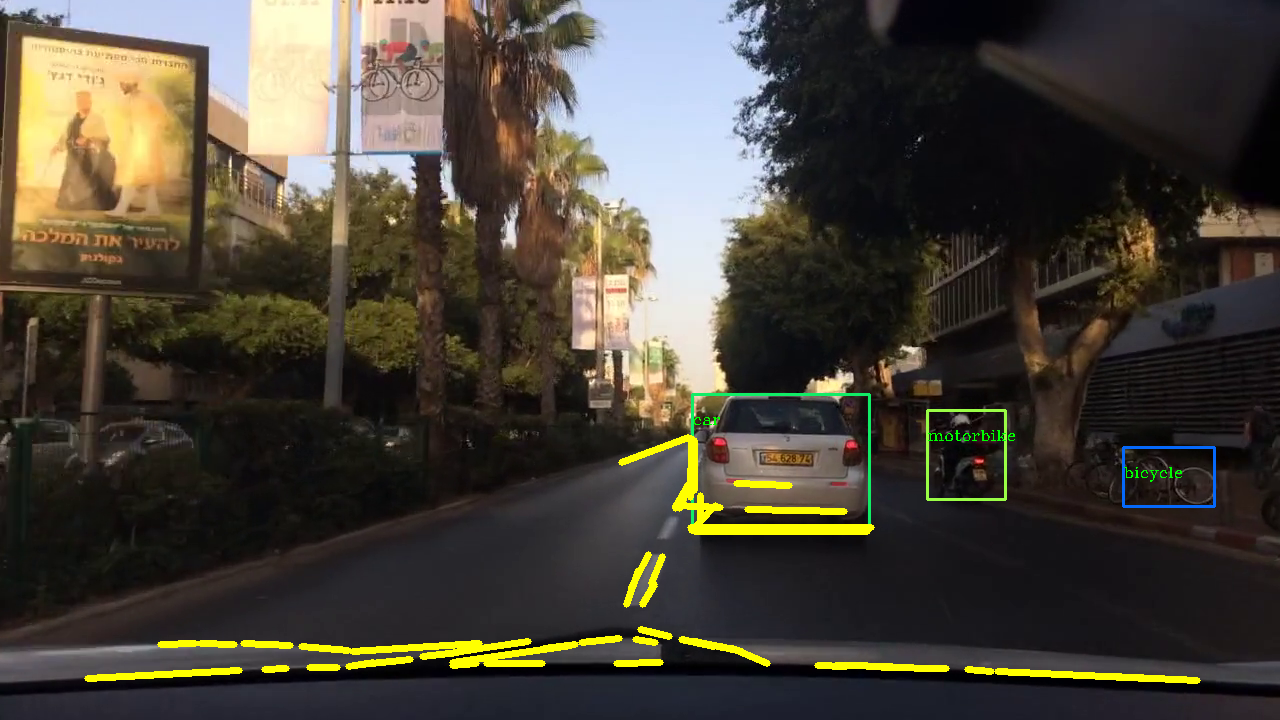

--(!) No captured frame -- Break!


In [30]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)

In [31]:
from google.colab import files
files.download(output_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>